In [1]:
from google.colab import files

uploaded = files.upload()

uploaded.keys()

Saving stance_examples1.csv to stance_examples1 (1).csv


dict_keys(['stance_examples1 (1).csv'])

In [2]:
# Install NLTK
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Install Korean font (e.g., NanumGothic) in Colab environment
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
# Re-import matplotlib and set font after installation
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

데이터 크기: (269, 3)
컬럼: Index(['sentence', 'stance', 'topic'], dtype='object')
                                            sentence stance  \
0  Sea exploration is essential for understanding...    pro   
1  Oceans cover over 70% of the Earth's surface, ...    pro   
2  Unlike space exploration, sea exploration has ...    pro   
3  The oceans hold untapped resources that could ...    pro   
4  Understanding ocean currents and marine life i...    pro   

                                               topic  
0  Sea exploration is more important than space e...  
1  Sea exploration is more important than space e...  
2  Sea exploration is more important than space e...  
3  Sea exploration is more important than space e...  
4  Sea exploration is more important than space e...  


/tmp/ipython-input-3703224322.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stance", data=df, palette="Set2", legend=False) # Updated for FutureWarning


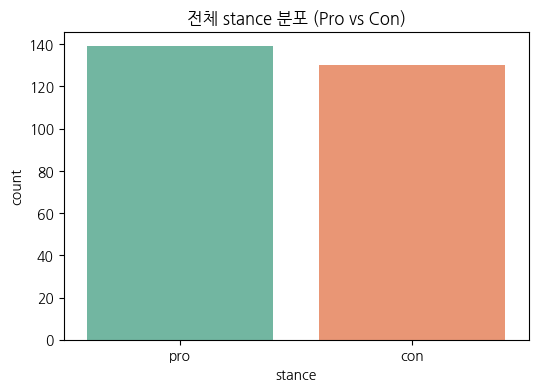

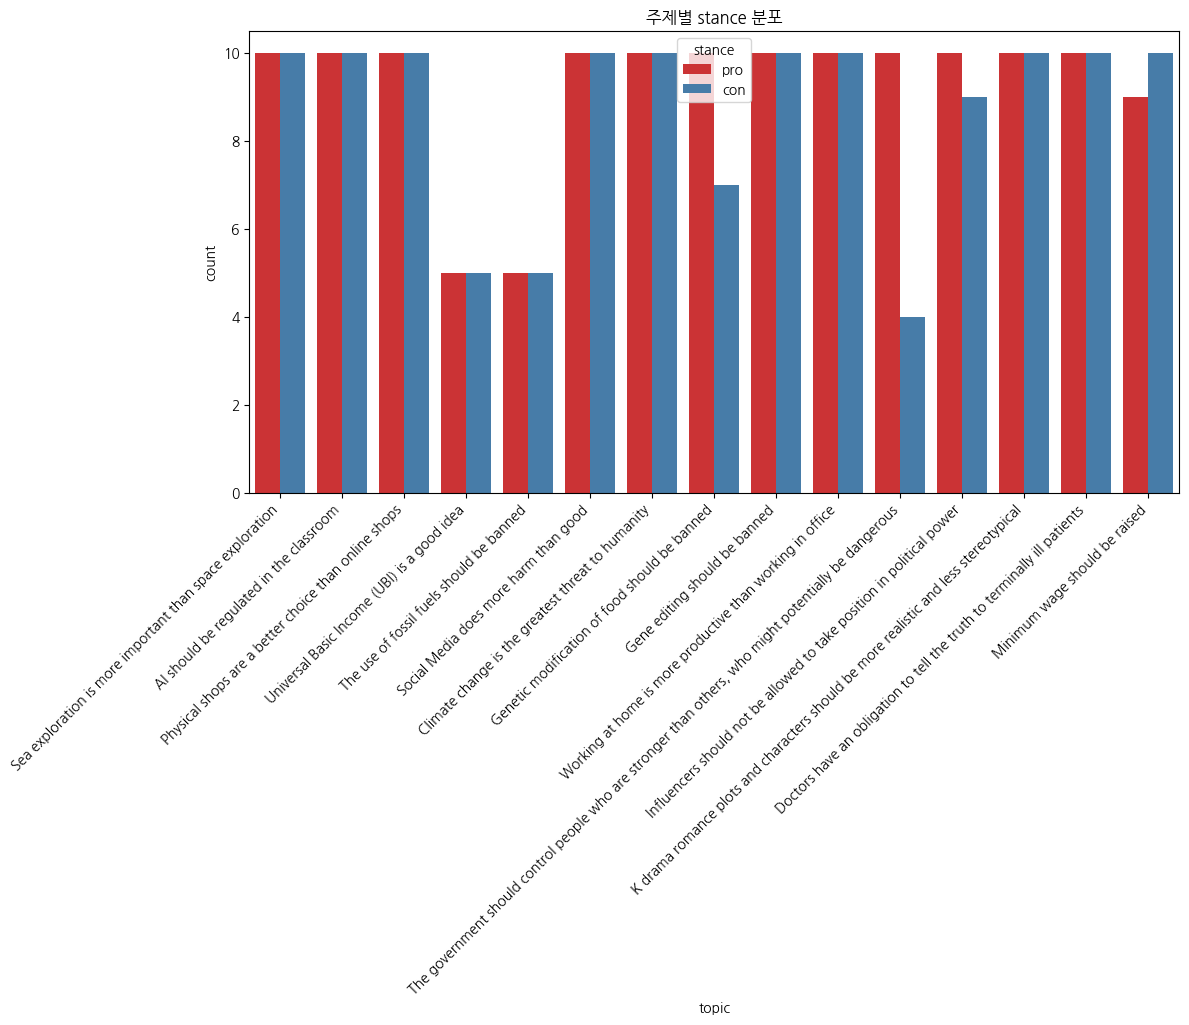

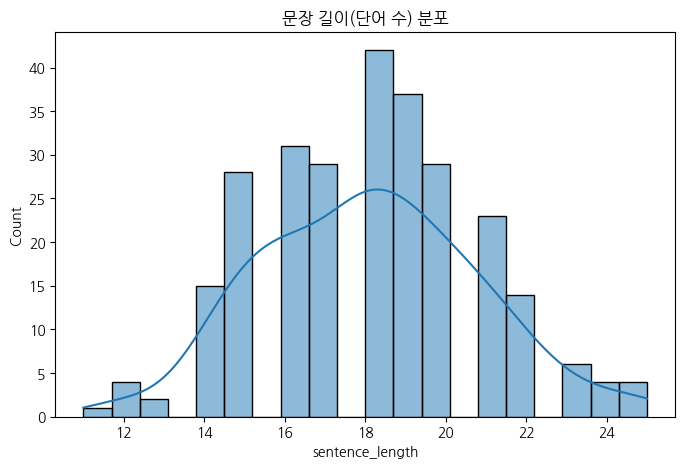

상위 20 필터링된 단어: [('social', 31), ('people', 28), ('climate', 24), ('change', 23), ('lead', 20), ('help', 19), ('political', 19), ('gene', 19), ('editing', 19), ('influencers', 19), ('minimum', 19), ('leading', 18), ('shopping', 18), ('media', 18), ('wage', 18), ('ai', 16), ('physical', 16), ('human', 15), ('allows', 15), ('patients', 15)]


In [5]:
# 1. 라이브러리에서 가져오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Configure matplotlib for Korean characters
plt.rcParams['font.family'] = 'NanumGothic' # Or any other Korean font installed on the system
plt.rcParams['axes.unicode_minus'] = False # To prevent breaking minus signs

# 2. 데이터 로드
df = pd.read_csv("stance_examples1.csv", encoding='cp949')

# 3. 기본 구조 확인
print("데이터 크기:", df.shape)
print("컬럼:", df.columns)
print(df.head())

# 4. stance 분포 확인
plt.figure(figsize=(6,4))
sns.countplot(x="stance", data=df, palette="Set2", legend=False) # Updated for FutureWarning
plt.title("전체 stance 분포 (Pro vs Con)")
plt.show()

# 5. topic별 stance 분포
plt.figure(figsize=(12,6))
sns.countplot(x="topic", hue="stance", data=df, palette="Set1")
plt.xticks(rotation=45, ha="right")
plt.title("주제별 stance 분포")
plt.show()

# 6. 문장 길이(단어 수) 분석
df["sentence_length"] = df["sentence"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df["sentence_length"], bins=20, kde=True)
plt.title("문장 길이(단어 수) 분포")
plt.show()

# 7. 가장 많이 등장하는 단어 Top 20 (필터링)
stop_words = set(stopwords.words('english'))
# Add additional words to filter
additional_stop_words = ['could', 'would', 'may']
stop_words.update(additional_stop_words)

all_words_filtered = [word for word in " ".join(df["sentence"]).lower().split() if word.isalpha() and word not in stop_words]
common_words_filtered = Counter(all_words_filtered).most_common(20)
print("상위 20 필터링된 단어:", common_words_filtered)
